In [37]:
import os
import pandas as pd 
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
c2c=pd.read_csv("Proactive Attrition Management-Logistic Regression Case Study.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
c2c.head(10)

,REVENUE,MOU,RECCHRGE,DIRECTAS,OVERAGE,ROAM,CHANGEM,CHANGER,DROPVCE,BLCKVCE,UNANSVCE,CUSTCARE,THREEWAY,MOUREC,OUTCALLS,INCALLS,PEAKVCE,OPEAKVCE,DROPBLK,CALLFWDV,CALLWAIT,CHURN,MONTHS,UNIQSUBS,ACTVSUBS,CSA,PHONES,MODELS,EQPDAYS,CUSTOMER,AGE1,AGE2,CHILDREN,CREDITA,CREDITAA,CREDITB,CREDITC,CREDITDE,CREDITGY,CREDITZ,PRIZMRUR,PRIZMUB,PRIZMTWN,REFURB,WEBCAP,TRUCK,RV,OCCPROF,OCCCLER,OCCCRFT,OCCSTUD,OCCHMKR,OCCRET,OCCSELF,OWNRENT,MARRYUN,MARRYYES,MARRYNO,MAILORD,MAILRES,MAILFLAG,TRAVEL,PCOWN,CREDITCD,RETCALLS,RETACCPT,NEWCELLY,NEWCELLN,REFER,INCMISS,INCOME,MCYCLE,CREDITAD,SETPRCM,SETPRC,RETCALL,CALIBRAT,CHURNDEP
0,57.49,482.75,37.43,0.25,22.75,0.00,532.25,50.99,8.33,1.00,61.33,1.67,0.33,55.28,46.33,6.33,83.67,157.00,9.33,0.0,5.67,0,56,1,1,MILMIL414,7.0,6.0,240.0,1000002,30.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,5,0,1,0,149.99,0,0,NaN
1,82.28,1312.25,75.00,1.24,0.00,0.00,156.75,8.14,52.00,7.67,76.00,4.33,1.33,200.32,370.33,147.00,555.67,303.67,59.67,0.0,22.67,0,59,2,2,PITHOM412,9.0,4.0,458.0,1000006,30.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,6,0,0,0,9.99,0,0,NaN
2,31.66,25.50,29.99,0.25,0.00,0.00,59.50,4.03,0.00,1.00,2.33,0.00,0.00,0.00,0.00,0.00,1.67,1.67,1.00,0.0,0.00,0,57,2,2,OKCTUL918,2.0,2.0,601.0,1000010,52.0,58.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,9,0,1,0,29.99,0,0,NaN
3,62.13,97.50,65.99,2.48,0.00,0.00,23.50,6.82,0.00,0.33,4.00,4.00,0.00,0.00,3.67,0.00,7.67,7.33,0.33,0.0,0.00,0,59,2,2,OKCOKC405,3.0,3.0,464.0,1000011,46.0,46.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,6,0,0,0,29.99,0,0,NaN
4,25.23,2.50,25.00,0.00,0.00,0.00,-2.50,-0.23,0.00,0.00,0.33,0.00,0.00,1.13,0.33,0.00,0.67,0.67,0.00,0.0,0.00,0,53,2,2,SANMCA210,2.0,2.0,354.0,1000014,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7,0,0,0,29.99,0,0,NaN
5,212.52,1971.50,84.99,2.23,249.50,35.50,-200.50,-106.77,9.00,0.00,43.67,0.33,0.00,718.07,49.33,4.67,351.67,128.67,9.00,0.0,1.00,0,59,5,1,SLCSLC801,10.0,6.0,199.0,1000015,30.0,22.0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,3,0,1,0,79.99,0,0,NaN
6,42.57,270.50,37.48,0.25,6.00,0.00,201.50,-1.79,3.33,1.67,7.67,1.00,0.00,57.09,11.00,3.67,62.33,18.00,5.00,0.0,0.33,0,55,2,2,OKCOKC405,5.0,4.0,697.0,1000016,58.0,58.0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,29.99,0,0,NaN
7,35.59,153.00,29.99,0.00,16.00,0.00,30.00,7.35,2.00,0.67,17.33,0.00,0.00,33.11,8.00,4.67,48.33,7.00,2.67,0.0,0.33,0,59,3,2,SLCSLC801,6.0,5.0,48.0,1000018,46.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,0,4,0,1,0,199.99,0,0,NaN
8,55.27,1212.75,49.99,0.74,0.00,1.29,169.25,0.99,2.67,6.00,43.67,4.33,0.00,490.13,50.67,8.33,189.33,105.00,8.67,0.0,4.33,0,52,1,1,OKCTUL918,4.0,4.0,408.0,1000019,58.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,3,0,0,0,9.99,0,0,NaN
9,50.97,162.00,69.99,0.00,2.50,0.00,-58.00,-0.98,1.67,0.33,9.00,0.33,0.00,38.37,34.33,5.67,19.33,42.33,2.00,0.0,0.00,0,56,1,1,MILMIL414,4.0,3.0,253.0,1000020,30.0,30.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,9.99,0,0,NaN


**DATA PRE-PROCESSING**

In [59]:
c2c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71047 entries, 0 to 71046
Data columns (total 78 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   REVENUE   70831 non-null  float64
 1   MOU       70831 non-null  float64
 2   RECCHRGE  70831 non-null  float64
 3   DIRECTAS  70831 non-null  float64
 4   OVERAGE   70831 non-null  float64
 5   ROAM      70831 non-null  float64
 6   CHANGEM   70545 non-null  float64
 7   CHANGER   70545 non-null  float64
 8   DROPVCE   71047 non-null  float64
 9   BLCKVCE   71047 non-null  float64
 10  UNANSVCE  71047 non-null  float64
 11  CUSTCARE  71047 non-null  float64
 12  THREEWAY  71047 non-null  float64
 13  MOUREC    71047 non-null  float64
 14  OUTCALLS  71047 non-null  float64
 15  INCALLS   71047 non-null  float64
 16  PEAKVCE   71047 non-null  float64
 17  OPEAKVCE  71047 non-null  float64
 18  DROPBLK   71047 non-null  float64
 19  CALLFWDV  71047 non-null  float64
 20  CALLWAIT  71047 non-null  fl

In [22]:
c2c.describe()

,REVENUE,MOU,RECCHRGE,DIRECTAS,OVERAGE,ROAM,CHANGEM,CHANGER,DROPVCE,BLCKVCE,UNANSVCE,CUSTCARE,THREEWAY,MOUREC,OUTCALLS,INCALLS,PEAKVCE,OPEAKVCE,DROPBLK,CALLFWDV,CALLWAIT,CHURN,MONTHS,UNIQSUBS,ACTVSUBS,PHONES,MODELS,EQPDAYS,CUSTOMER,AGE1,AGE2,CHILDREN,CREDITA,CREDITAA,CREDITB,CREDITC,CREDITDE,CREDITGY,CREDITZ,PRIZMRUR,PRIZMUB,PRIZMTWN,REFURB,WEBCAP,TRUCK,RV,OCCPROF,OCCCLER,OCCCRFT,OCCSTUD,OCCHMKR,OCCRET,OCCSELF,OWNRENT,MARRYUN,MARRYYES,MARRYNO,MAILORD,MAILRES,MAILFLAG,TRAVEL,PCOWN,CREDITCD,RETCALLS,RETACCPT,NEWCELLY,NEWCELLN,REFER,INCMISS,INCOME,MCYCLE,CREDITAD,SETPRCM,SETPRC,RETCALL,CALIBRAT,CHURNDEP
count,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.0,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,7.104700e+04,71047.000000,71047.00000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000
mean,58.005919,519.823658,46.537130,0.838359,37.560007,0.914369,-10.503866,-1.432346,5.829352,3.726457,27.587352,1.736974,0.256028,112.536345,24.787867,7.795471,88.818752,66.218617,9.781674,0.0,1.674562,0.290076,18.712951,1.529551,1.351655,1.808617,1.561791,378.545572,1.050487e+06,31.311620,21.09874,0.242389,0.167664,0.370881,0.164525,0.104438,0.128478,0.022647,0.041367,0.047743,0.321111,0.148423,0.139612,0.902811,0.187214,0.081200,0.173899,0.020057,0.029642,0.007572,0.003153,0.014512,0.017833,0.331921,0.384816,0.365378,0.249806,0.361972,0.377201,0.014413,0.057483,0.185412,0.676425,0.037004,0.017918,0.192943,0.138781,0.050854,0.249835,4.334229,0.013456,0.053162,0.566512,35.798584,0.034034,0.563008,0.500000
std,38.283623,499.786544,21.903305,1.639527,74.239634,2.999793,219.754520,28.894647,7.740130,7.395741,33.605823,3.683012,0.639431,152.338348,31.382244,13.614217,94.247525,83.357736,12.631718,0.0,3.723234,0.453800,9.658092,1.131774,0.660049,1.336111,0.908274,247.689156,2.919911e+04,21.749594,23.55667,0.428531,0.373570,0.483044,0.370754,0.305830,0.334624,0.148776,0.199139,0.213224,0.466907,0.355521,0.346586,0.296217,0.390086,0.273144,0.379025,0.140197,0.169600,0.086690,0.056062,0.119587,0.132346,0.470906,0.486555,0.481539,0.432904,0.480574,0.484689,0.119187,0.232765,0.388635,0.467843,0.205823,0.141485,0.394611,0.345721,0.290444,0.432920,3.137063,0.115217,0.374988,0.495560,57.040964,0.181317,0.496018,0.375172
min,10.000000,0.000000,9.190000,0.000000,0.000000,0.000000,-829.655000,-104.136200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,7.000000,1.000001e+06,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.700000,158.750000,30.000000,0.000000,0.000000,0.000000,-82.250000,-6.980000,0.670000,0.000000,5.330000,0.000000,0.000000,8.430000,3.330000,0.000000,23.000000,11.000000,1.670000,0.0,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,204.0

In [23]:
c2c["CHURN"].value_counts()

0    50438
1    20609
Name: CHURN, dtype: int64

In [61]:
#total null values in each column
c2c.isnull().sum()

REVENUE       216
MOU           216
RECCHRGE      216
DIRECTAS      216
OVERAGE       216
ROAM          216
CHANGEM       502
CHANGER       502
DROPVCE         0
BLCKVCE         0
UNANSVCE        0
CUSTCARE        0
THREEWAY        0
MOUREC          0
OUTCALLS        0
INCALLS         0
PEAKVCE         0
OPEAKVCE        0
DROPBLK         0
CALLFWDV        0
CALLWAIT        0
CHURN           0
MONTHS          0
UNIQSUBS        0
ACTVSUBS        0
CSA            28
PHONES          1
MODELS          1
EQPDAYS         1
CUSTOMER        0
AGE1         1244
AGE2         1244
CHILDREN        0
CREDITA         0
CREDITAA        0
CREDITB         0
CREDITC         0
CREDITDE        0
CREDITGY        0
CREDITZ         0
PRIZMRUR        0
PRIZMUB         0
PRIZMTWN        0
REFURB          0
WEBCAP          0
TRUCK           0
RV              0
OCCPROF         0
OCCCLER         0
OCCCRFT         0
OCCSTUD         0
OCCHMKR         0
OCCRET          0
OCCSELF         0
OWNRENT         0
MARRYUN   

**MISSING VALUES**

In [5]:
#total null values in whole data frame
c2c.isnull().sum().sum()

35866

In [6]:
#replacing null values with their mean
c2c=c2c.fillna(c2c.mean())

In [7]:
#replacing null value at CSA(object type) by value above them
c2c["CSA"].fillna(method='ffill',inplace=True)

In [8]:
c2c.head(10)

,REVENUE,MOU,RECCHRGE,DIRECTAS,OVERAGE,ROAM,CHANGEM,CHANGER,DROPVCE,BLCKVCE,UNANSVCE,CUSTCARE,THREEWAY,MOUREC,OUTCALLS,INCALLS,PEAKVCE,OPEAKVCE,DROPBLK,CALLFWDV,CALLWAIT,CHURN,MONTHS,UNIQSUBS,ACTVSUBS,CSA,PHONES,MODELS,EQPDAYS,CUSTOMER,AGE1,AGE2,CHILDREN,CREDITA,CREDITAA,CREDITB,CREDITC,CREDITDE,CREDITGY,CREDITZ,PRIZMRUR,PRIZMUB,PRIZMTWN,REFURB,WEBCAP,TRUCK,RV,OCCPROF,OCCCLER,OCCCRFT,OCCSTUD,OCCHMKR,OCCRET,OCCSELF,OWNRENT,MARRYUN,MARRYYES,MARRYNO,MAILORD,MAILRES,MAILFLAG,TRAVEL,PCOWN,CREDITCD,RETCALLS,RETACCPT,NEWCELLY,NEWCELLN,REFER,INCMISS,INCOME,MCYCLE,CREDITAD,SETPRCM,SETPRC,RETCALL,CALIBRAT,CHURNDEP
0,57.49,482.75,37.43,0.25,22.75,0.00,532.25,50.99,8.33,1.00,61.33,1.67,0.33,55.28,46.33,6.33,83.67,157.00,9.33,0.0,5.67,0,56,1,1,MILMIL414,7.0,6.0,240.0,1000002,30.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,5,0,1,0,149.99,0,0,0.5
1,82.28,1312.25,75.00,1.24,0.00,0.00,156.75,8.14,52.00,7.67,76.00,4.33,1.33,200.32,370.33,147.00,555.67,303.67,59.67,0.0,22.67,0,59,2,2,PITHOM412,9.0,4.0,458.0,1000006,30.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,6,0,0,0,9.99,0,0,0.5
2,31.66,25.50,29.99,0.25,0.00,0.00,59.50,4.03,0.00,1.00,2.33,0.00,0.00,0.00,0.00,0.00,1.67,1.67,1.00,0.0,0.00,0,57,2,2,OKCTUL918,2.0,2.0,601.0,1000010,52.0,58.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,9,0,1,0,29.99,0,0,0.5
3,62.13,97.50,65.99,2.48,0.00,0.00,23.50,6.82,0.00,0.33,4.00,4.00,0.00,0.00,3.67,0.00,7.67,7.33,0.33,0.0,0.00,0,59,2,2,OKCOKC405,3.0,3.0,464.0,1000011,46.0,46.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,6,0,0,0,29.99,0,0,0.5
4,25.23,2.50,25.00,0.00,0.00,0.00,-2.50,-0.23,0.00,0.00,0.33,0.00,0.00,1.13,0.33,0.00,0.67,0.67,0.00,0.0,0.00,0,53,2,2,SANMCA210,2.0,2.0,354.0,1000014,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7,0,0,0,29.99,0,0,0.5
5,212.52,1971.50,84.99,2.23,249.50,35.50,-200.50,-106.77,9.00,0.00,43.67,0.33,0.00,718.07,49.33,4.67,351.67,128.67,9.00,0.0,1.00,0,59,5,1,SLCSLC801,10.0,6.0,199.0,1000015,30.0,22.0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,3,0,1,0,79.99,0,0,0.5
6,42.57,270.50,37.48,0.25,6.00,0.00,201.50,-1.79,3.33,1.67,7.67,1.00,0.00,57.09,11.00,3.67,62.33,18.00,5.00,0.0,0.33,0,55,2,2,OKCOKC405,5.0,4.0,697.0,1000016,58.0,58.0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,29.99,0,0,0.5
7,35.59,153.00,29.99,0.00,16.00,0.00,30.00,7.35,2.00,0.67,17.33,0.00,0.00,33.11,8.00,4.67,48.33,7.00,2.67,0.0,0.33,0,59,3,2,SLCSLC801,6.0,5.0,48.0,1000018,46.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,0,4,0,1,0,199.99,0,0,0.5
8,55.27,1212.75,49.99,0.74,0.00,1.29,169.25,0.99,2.67,6.00,43.67,4.33,0.00,490.13,50.67,8.33,189.33,105.00,8.67,0.0,4.33,0,52,1,1,OKCTUL918,4.0,4.0,408.0,1000019,58.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,3,0,0,0,9.99,0,0,0.5
9,50.97,162.00,69.99,0.00,2.50,0.00,-58.00,-0.98,1.67,0.33,9.00,0.33,0.00,38.37,34.33,5.67,19.33,42.33,2.00,0.0,0.00,0,56,1,1,MILMIL414,4.0,3.0,253.0,1000020,30.0,30.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,9.99,0,0,0.5


In [9]:
#no remaining null values
c2c.isnull().sum().sum()

0

In [10]:
c2c.isnull().sum()

REVENUE     0
MOU         0
RECCHRGE    0
DIRECTAS    0
OVERAGE     0
           ..
SETPRCM     0
SETPRC      0
RETCALL     0
CALIBRAT    0
CHURNDEP    0
Length: 78, dtype: int64

In [69]:
c2c.nunique()

REVENUE     14366
MOU          8934
RECCHRGE     4891
DIRECTAS      162
OVERAGE      2329
ROAM         2268
CHANGEM      6848
CHANGER     13952
DROPVCE       304
BLCKVCE       401
UNANSVCE      916
CUSTCARE      198
THREEWAY       88
MOUREC      27461
OUTCALLS      841
INCALLS       500
PEAKVCE      2002
OPEAKVCE     1817
DROPBLK       481
CALLFWDV       39
CALLWAIT      246
CHURN           2
MONTHS         56
UNIQSUBS       15
ACTVSUBS       12
CSA           773
PHONES         25
MODELS         15
EQPDAYS      1497
CUSTOMER    71047
AGE1           44
AGE2           44
CHILDREN        2
CREDITA         2
CREDITAA        2
CREDITB         2
CREDITC         2
CREDITDE        2
CREDITGY        2
CREDITZ         2
PRIZMRUR        2
PRIZMUB         2
PRIZMTWN        2
REFURB          2
WEBCAP          2
TRUCK           2
RV              2
OCCPROF         2
OCCCLER         2
OCCCRFT         2
OCCSTUD         2
OCCHMKR         2
OCCRET          2
OCCSELF         2
OWNRENT         2
MARRYUN   

**OUTLIERS**

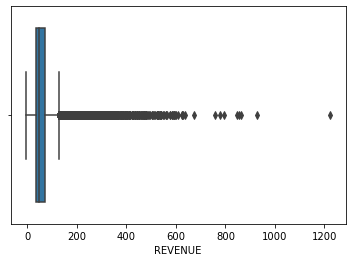

In [74]:
sns.boxplot(c2c['REVENUE'])

In [76]:
cp=c2c.drop("CSA",axis=1)

In [77]:
cp.head(5)

,REVENUE,MOU,RECCHRGE,DIRECTAS,OVERAGE,ROAM,CHANGEM,CHANGER,DROPVCE,BLCKVCE,UNANSVCE,CUSTCARE,THREEWAY,MOUREC,OUTCALLS,INCALLS,PEAKVCE,OPEAKVCE,DROPBLK,CALLFWDV,CALLWAIT,CHURN,MONTHS,UNIQSUBS,ACTVSUBS,PHONES,MODELS,EQPDAYS,CUSTOMER,AGE1,AGE2,CHILDREN,CREDITA,CREDITAA,CREDITB,CREDITC,CREDITDE,CREDITGY,CREDITZ,PRIZMRUR,PRIZMUB,PRIZMTWN,REFURB,WEBCAP,TRUCK,RV,OCCPROF,OCCCLER,OCCCRFT,OCCSTUD,OCCHMKR,OCCRET,OCCSELF,OWNRENT,MARRYUN,MARRYYES,MARRYNO,MAILORD,MAILRES,MAILFLAG,TRAVEL,PCOWN,CREDITCD,RETCALLS,RETACCPT,NEWCELLY,NEWCELLN,REFER,INCMISS,INCOME,MCYCLE,CREDITAD,SETPRCM,SETPRC,RETCALL,CALIBRAT,CHURNDEP
0,57.49,482.75,37.43,0.25,22.75,0.0,532.25,50.99,8.33,1.00,61.33,1.67,0.33,55.28,46.33,6.33,83.67,157.00,9.33,0.0,5.67,0,56,1,1,7.0,6.0,240.0,1000002,30.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,5,0,1,0,149.99,0,0,0.5
1,82.28,1312.25,75.00,1.24,0.00,0.0,156.75,8.14,52.00,7.67,76.00,4.33,1.33,200.32,370.33,147.00,555.67,303.67,59.67,0.0,22.67,0,59,2,2,9.0,4.0,458.0,1000006,30.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,6,0,0,0,9.99,0,0,0.5
2,31.66,25.50,29.99,0.25,0.00,0.0,59.50,4.03,0.00,1.00,2.33,0.00,0.00,0.00,0.00,0.00,1.67,1.67,1.00,0.0,0.00,0,57,2,2,2.0,2.0,601.0,1000010,52.0,58.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,9,0,1,0,29.99,0,0,0.5
3,62.13,97.50,65.99,2.48,0.00,0.0,23.50,6.82,0.00,0.33,4.00,4.00,0.00,0.00,3.67,0.00,7.67,7.33,0.33,0.0,0.00,0,59,2,2,3.0,3.0,464.0,1000011,46.0,46.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,6,0,0,0,29.99,0,0,0.5
4,25.23,2.50,25.00,0.00,0.00,0.0,-2.50,-0.23,0.00,0.00,0.33,0.00,0.00,1.13,0.33,0.00,0.67,0.67,0.00,0.0,0.00,0,53,2,2,2.0,2.0,354.0,1000014,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7,0,0,0,29.99,0,0,0.5


<ipython-input-80-b73b69b16813>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-80-b73b69b16813>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-80-b73b69b16813>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-80-b73b69b16813>:2: RuntimeW

<ipython-input-80-b73b69b16813>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-80-b73b69b16813>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-80-b73b69b16813>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-80-b73b69b16813>:2: RuntimeW

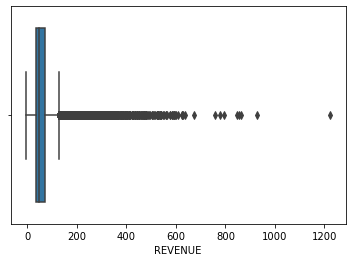

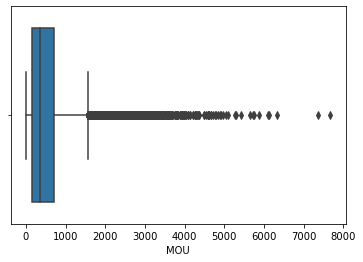

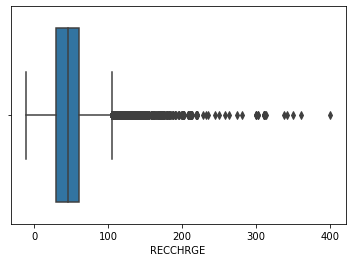

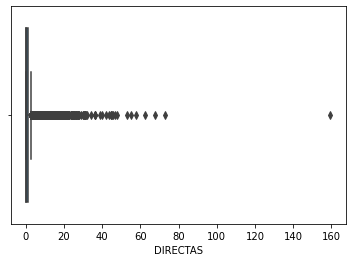

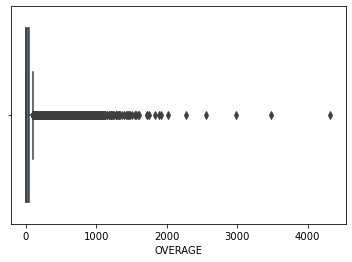

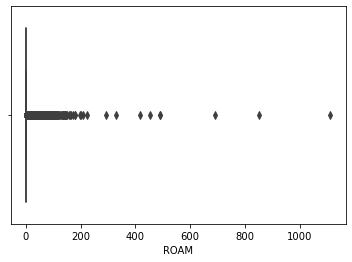

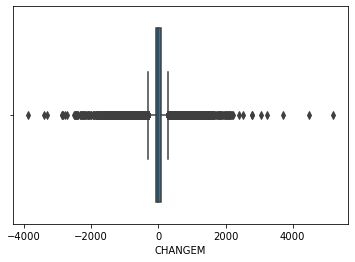

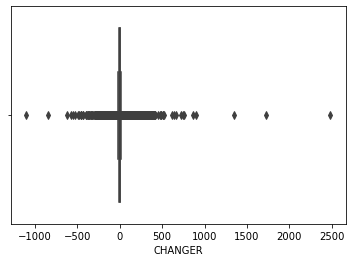

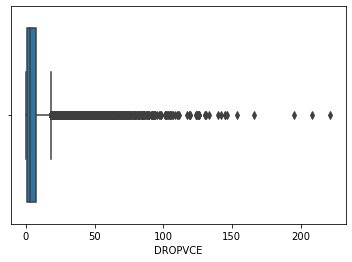

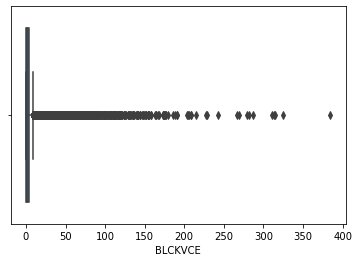

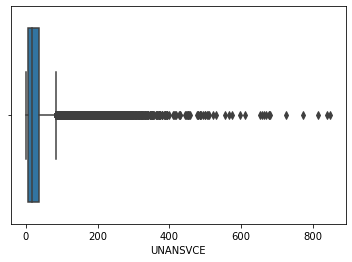

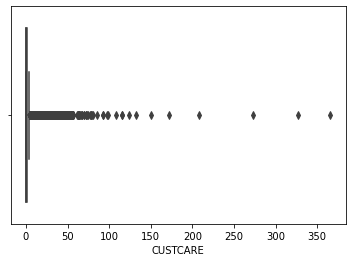

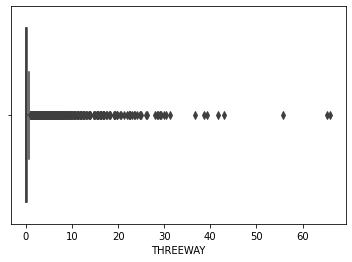

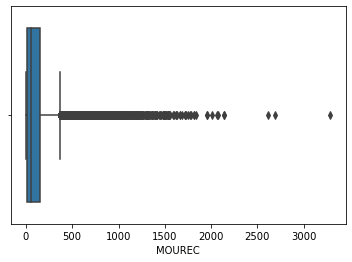

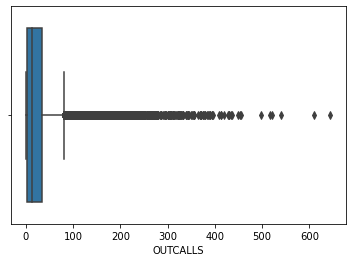

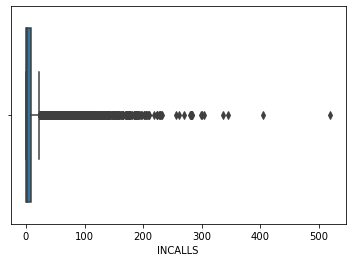

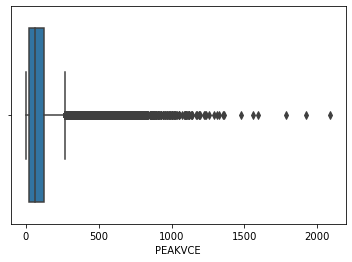

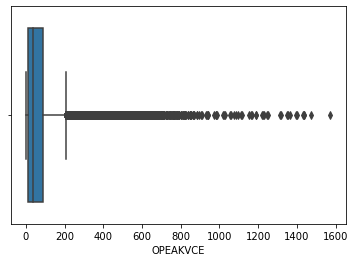

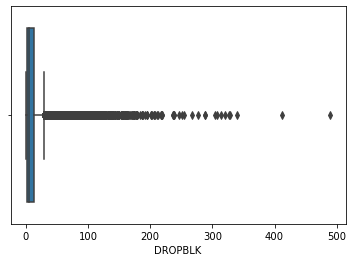

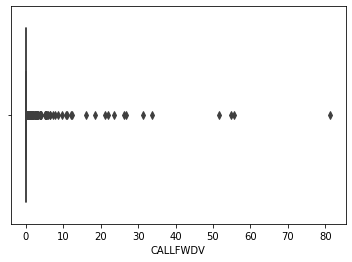

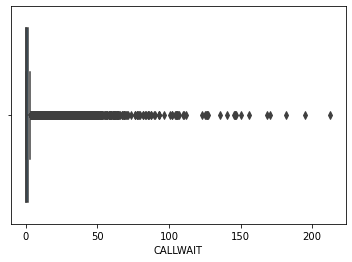

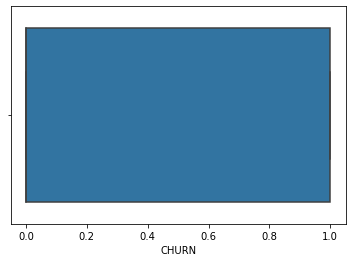

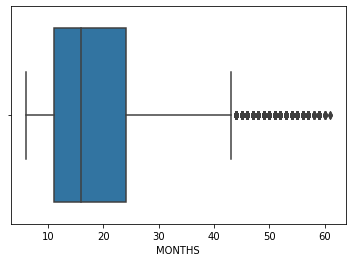

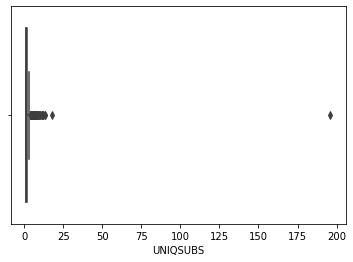

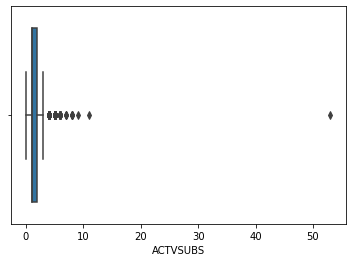

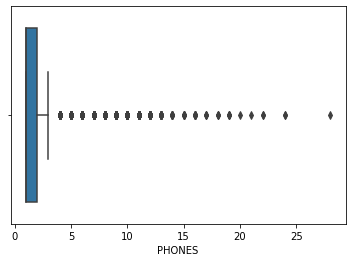

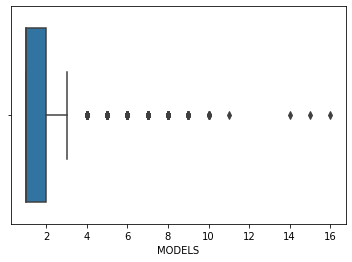

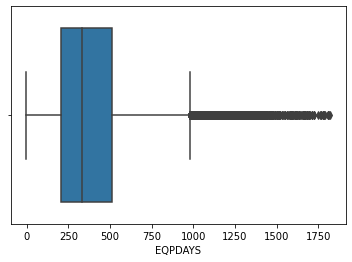

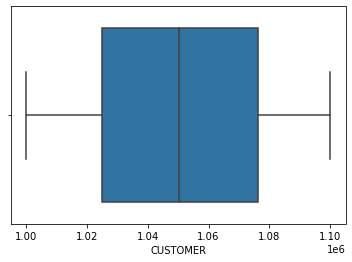

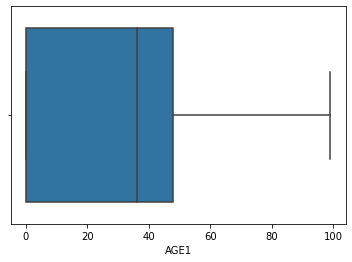

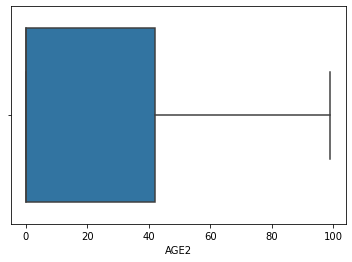

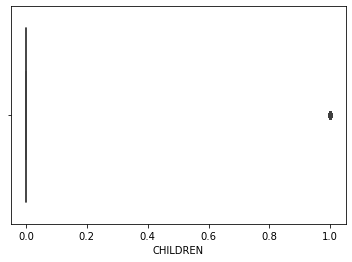

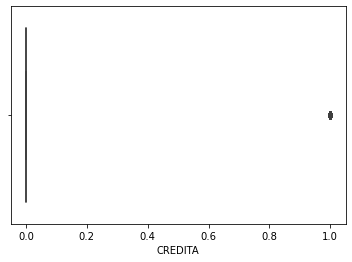

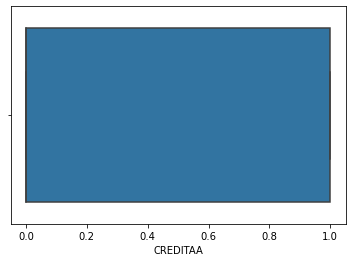

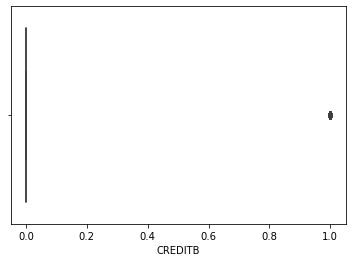

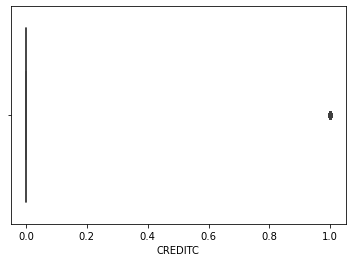

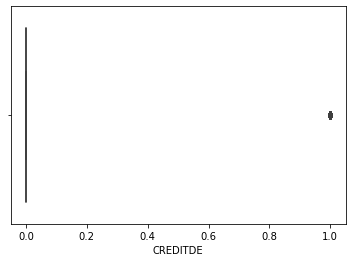

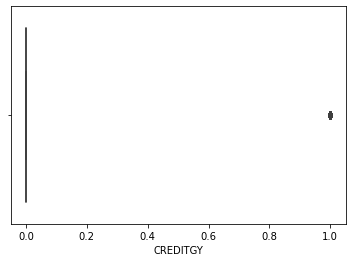

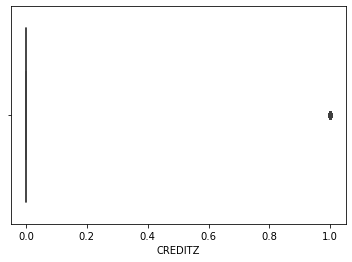

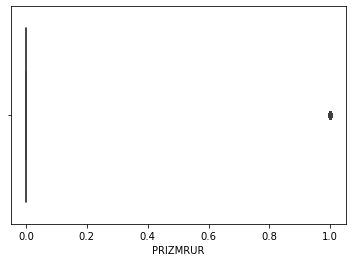

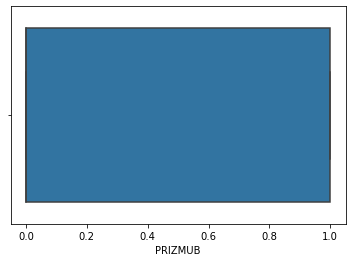

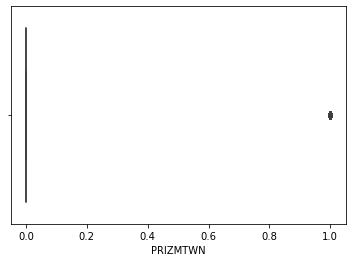

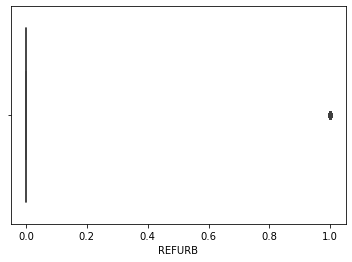

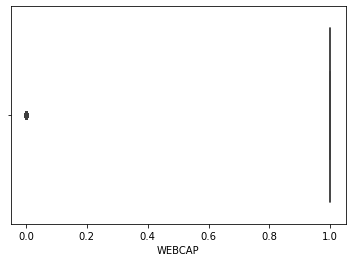

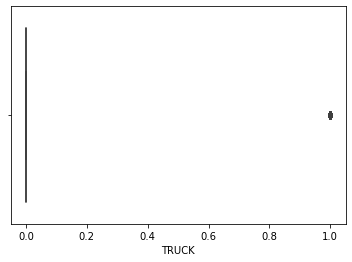

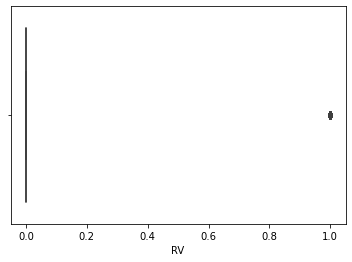

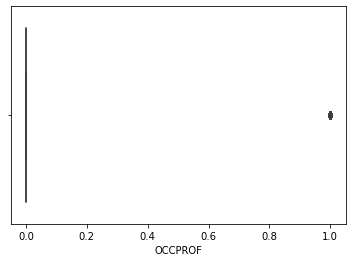

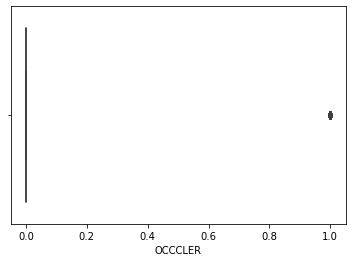

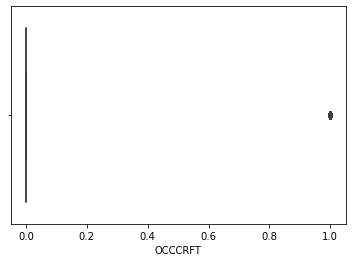

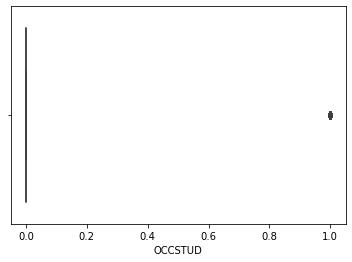

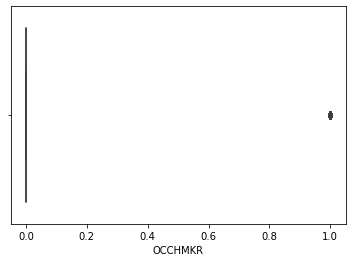

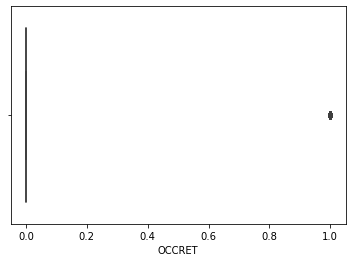

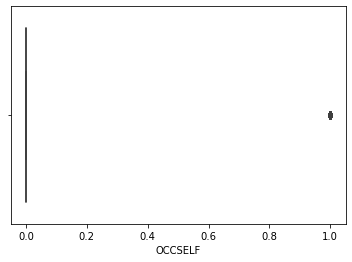

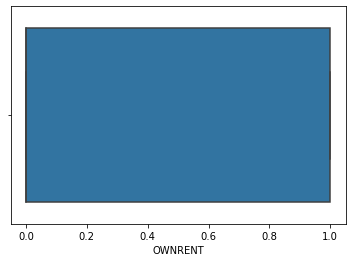

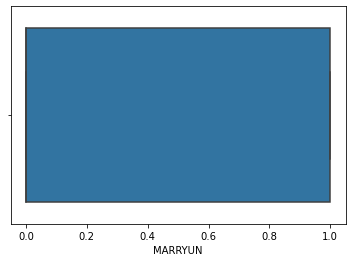

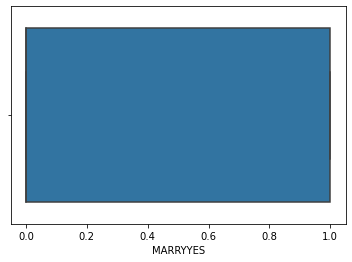

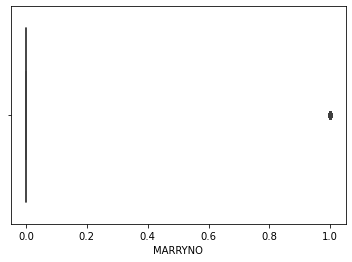

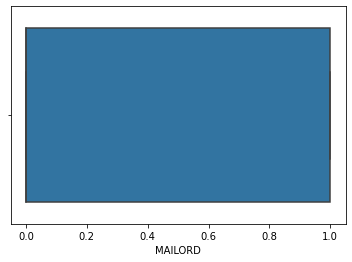

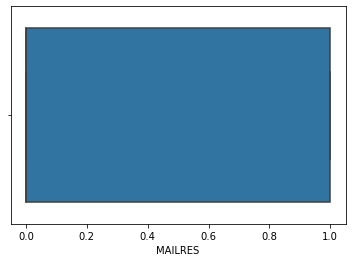

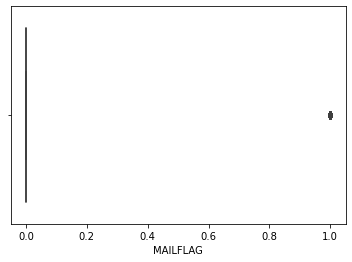

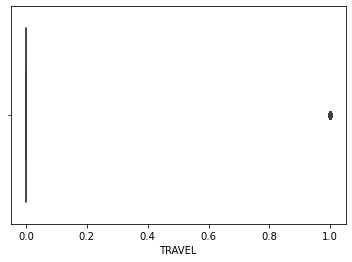

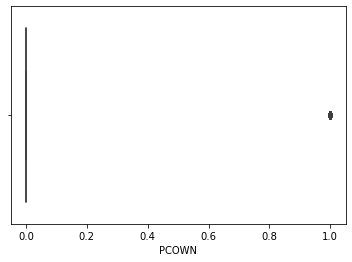

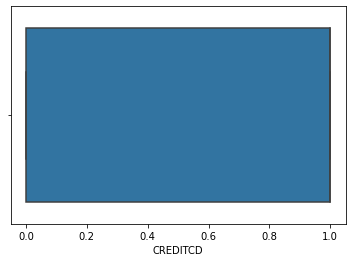

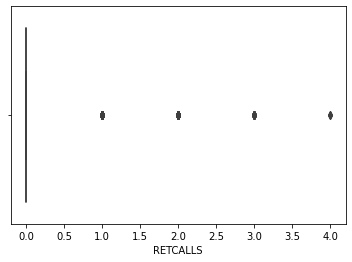

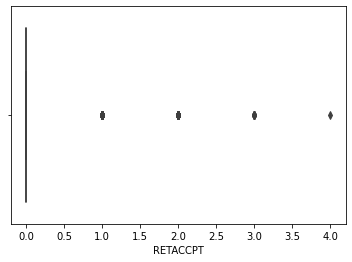

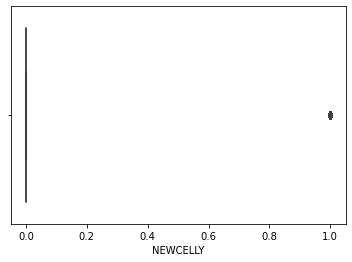

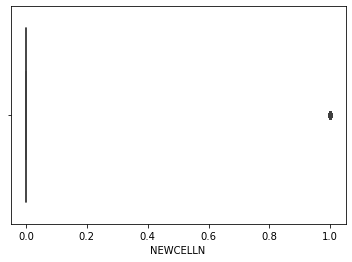

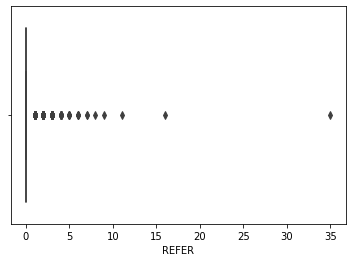

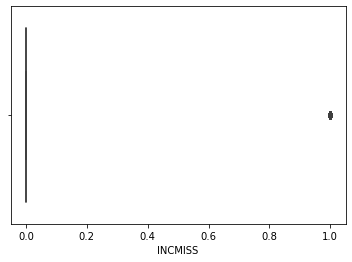

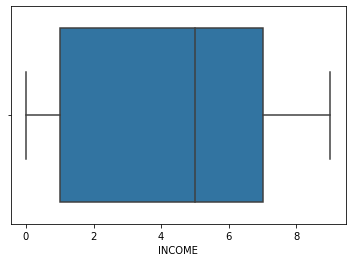

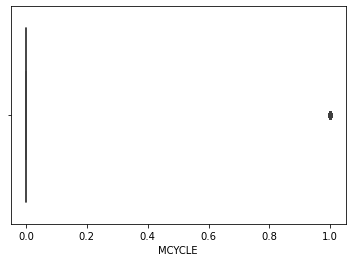

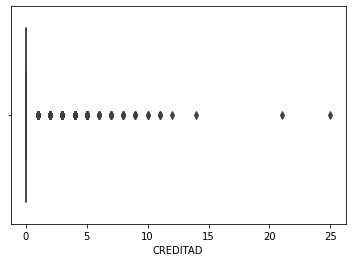

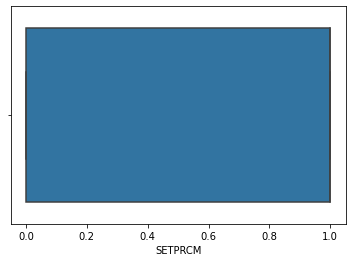

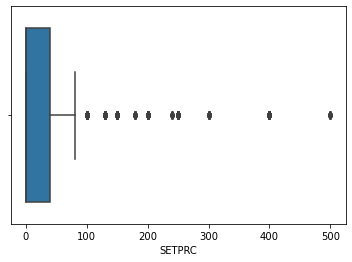

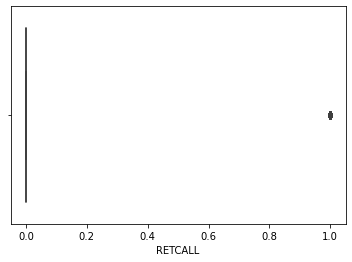

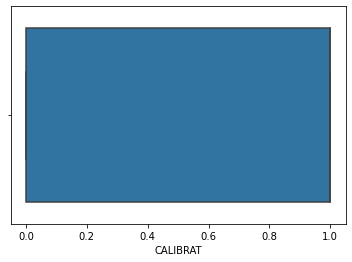

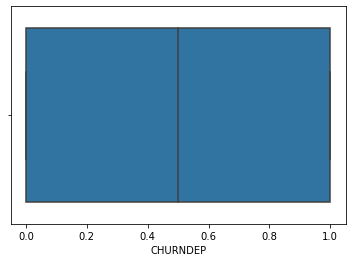

In [80]:
#detecting outliers using boxplot
for column in cp:
    plt.figure()
    sns.boxplot(c2c[column])

In [13]:
#columns with significant outliers 
outColumns=['REVENUE','MOU','RECCHRGE','DIRECTAS','OVERAGE','ROAM','CHANGEM','CHANGER','DROPVCE','BLCKVCE','UNANSVCE','CUSTCARE','THREEWAY','MOUREC','OUTCALLS','INCALLS','PEAKVCE','OPEAKVCE','DROPBLK','CALLFWDV','CALLWAIT','MONTHS','EQPDAYS','AGE1','AGE2']

In [12]:
#outlier capping
for column in outColumns:
    upper_limit = c2c[column].quantile(0.99)
    lower_limit = c2c[column].quantile(0.01)
    c2c[column] = np.where(c2c[column] >= upper_limit,
            upper_limit,
            np.where(c2c[column] <= lower_limit,
            lower_limit,
            c2c[column]))

<ipython-input-87-03f841a540cf>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-87-03f841a540cf>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-87-03f841a540cf>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-87-03f841a540cf>:3: RuntimeW

<ipython-input-87-03f841a540cf>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-87-03f841a540cf>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-87-03f841a540cf>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-87-03f841a540cf>:3: RuntimeW

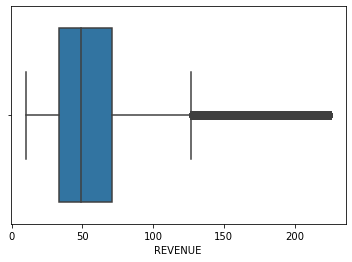

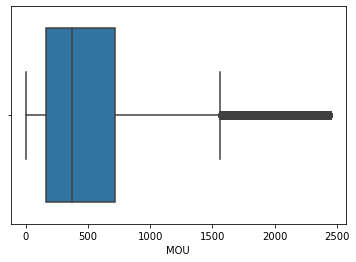

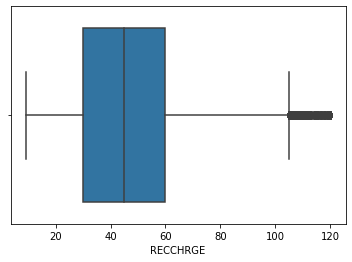

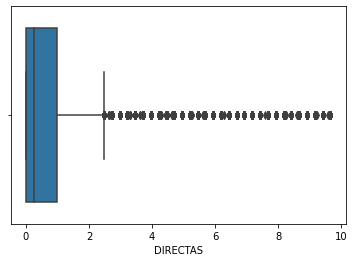

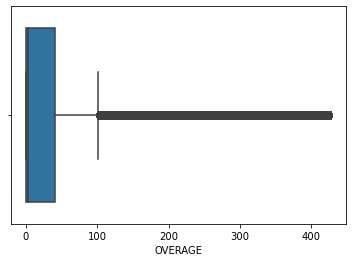

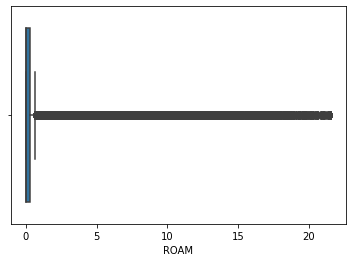

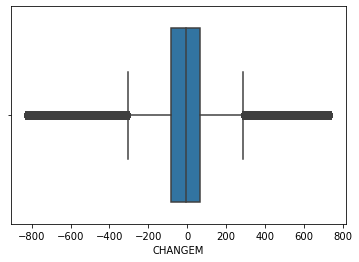

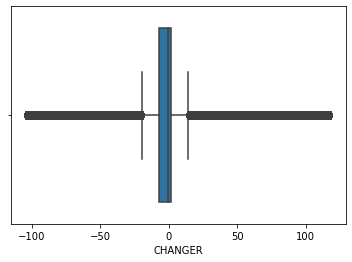

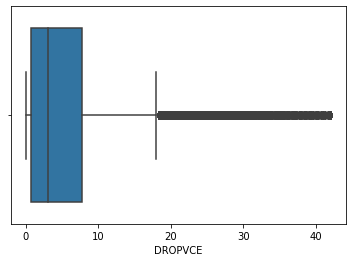

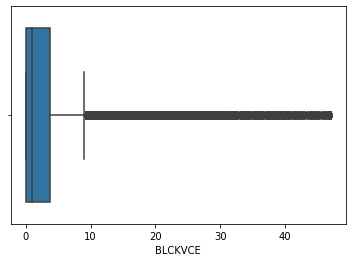

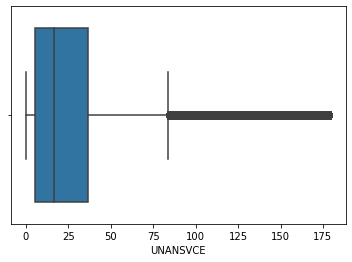

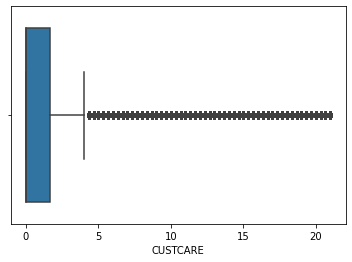

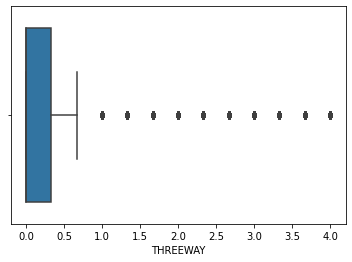

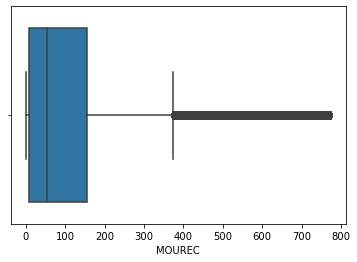

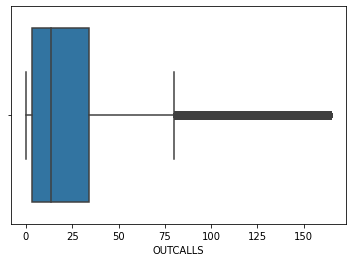

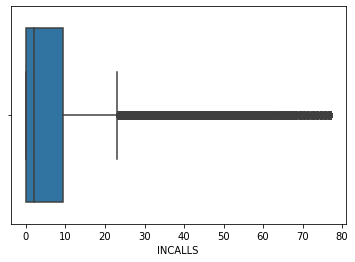

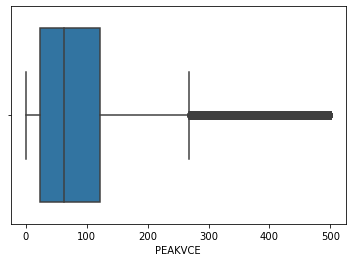

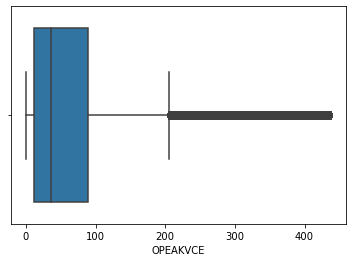

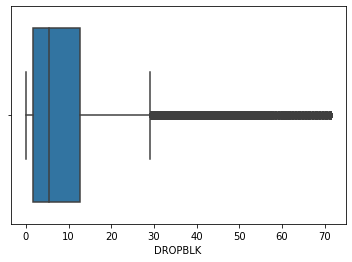

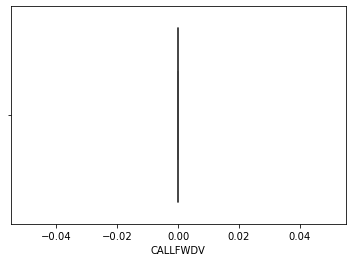

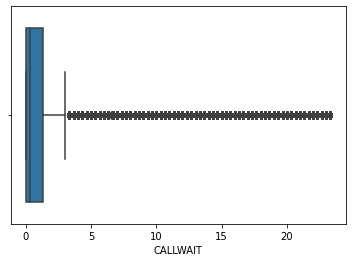

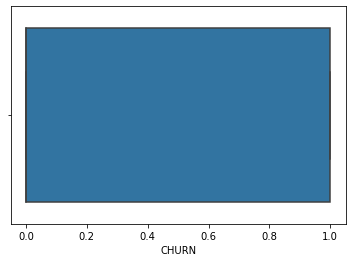

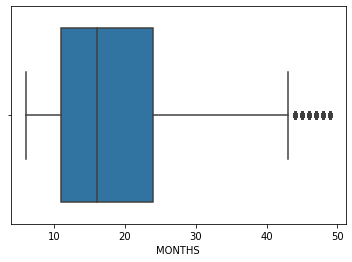

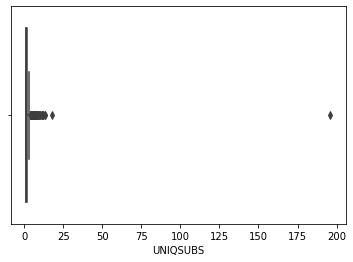

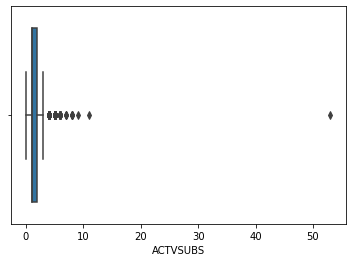

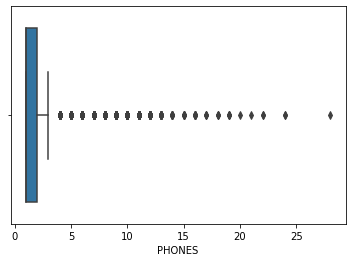

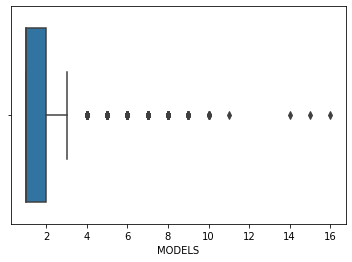

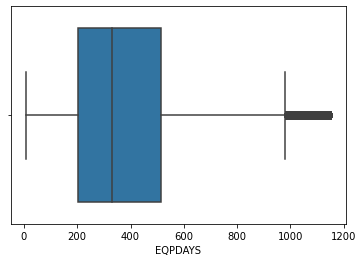

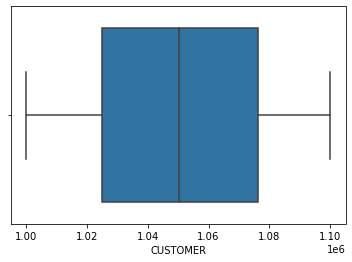

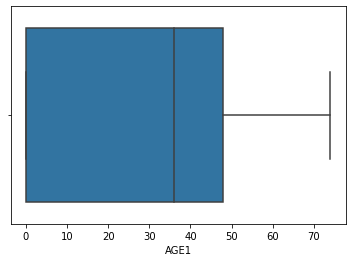

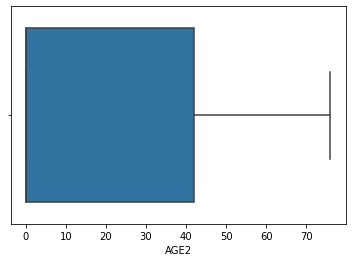

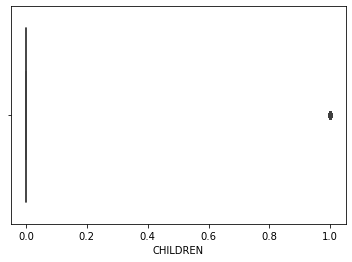

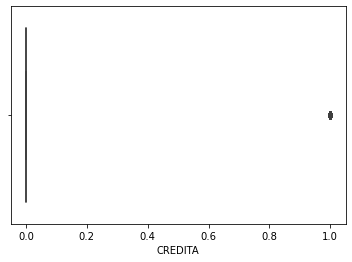

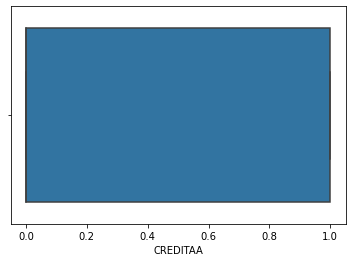

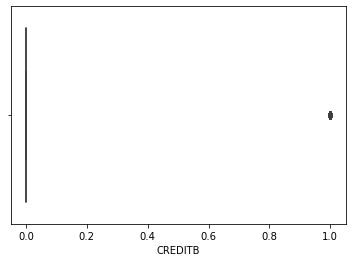

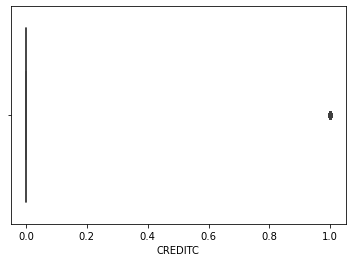

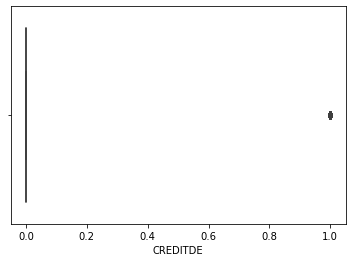

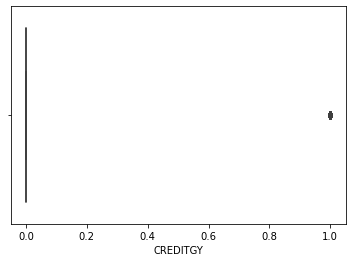

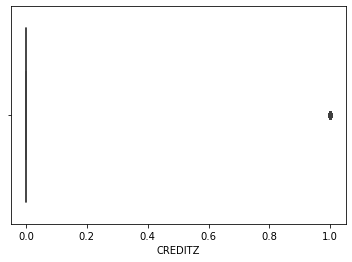

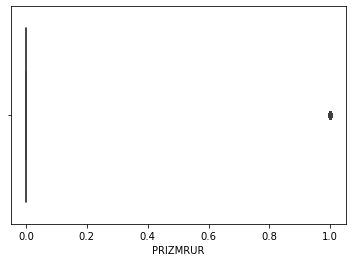

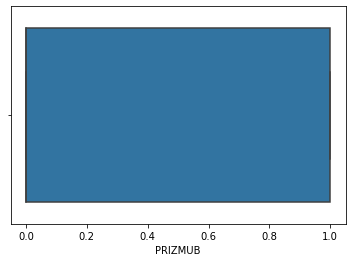

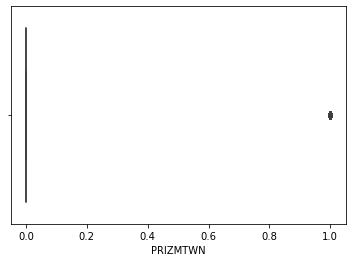

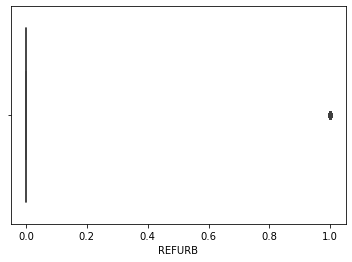

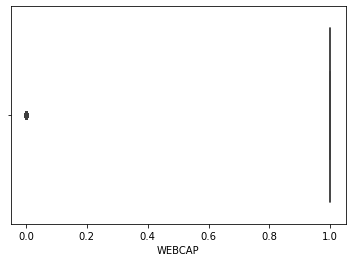

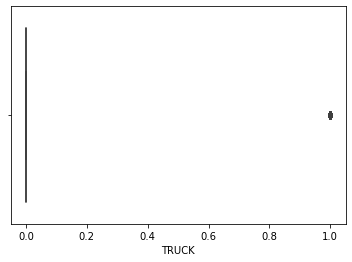

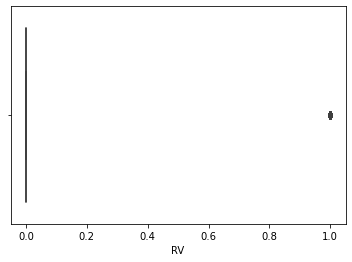

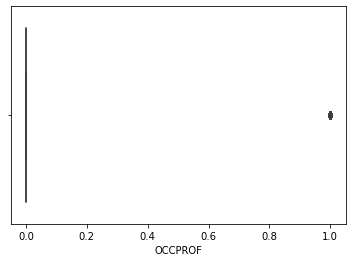

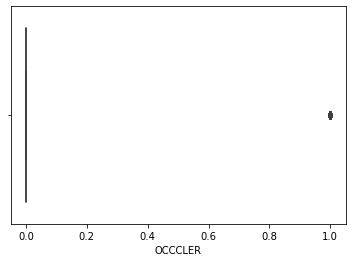

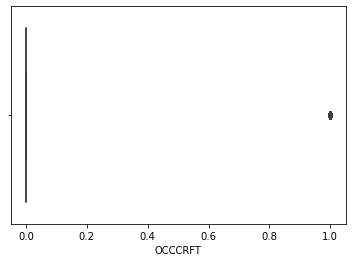

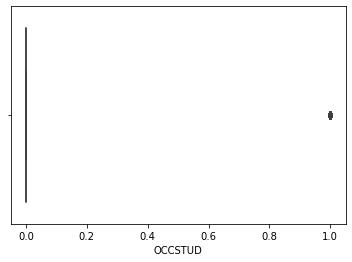

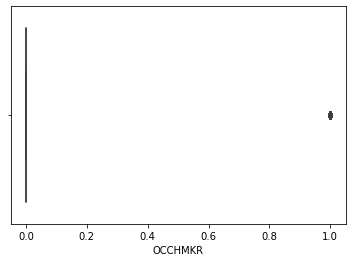

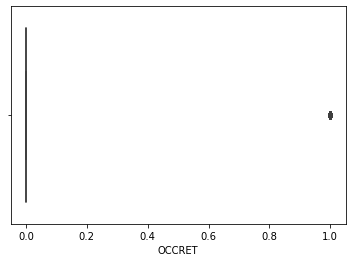

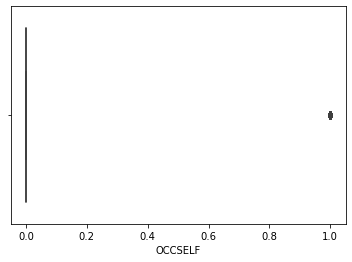

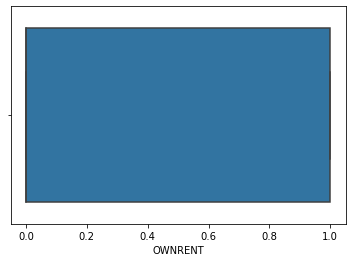

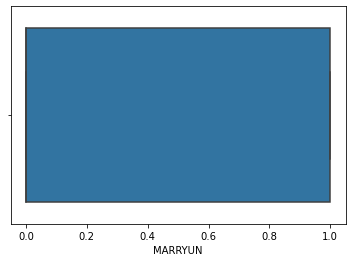

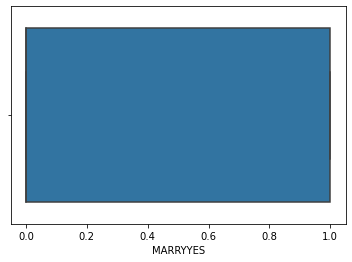

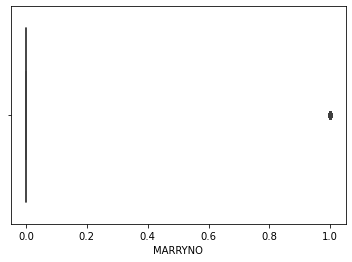

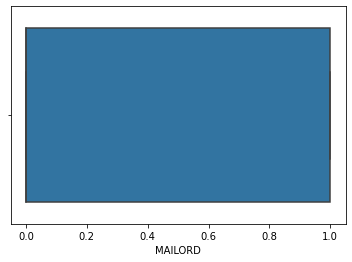

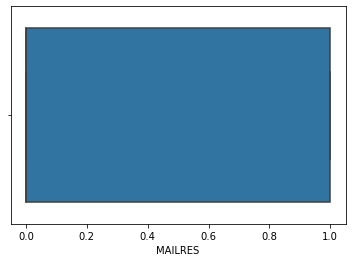

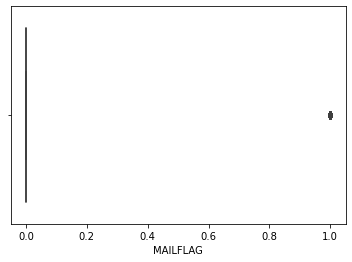

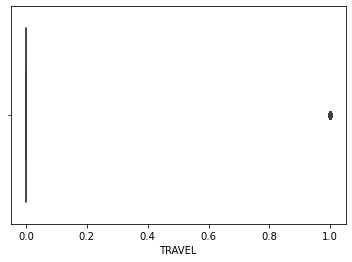

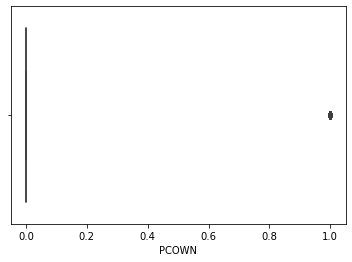

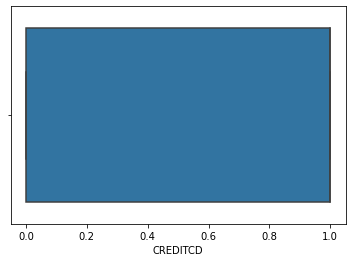

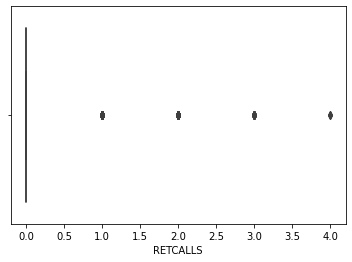

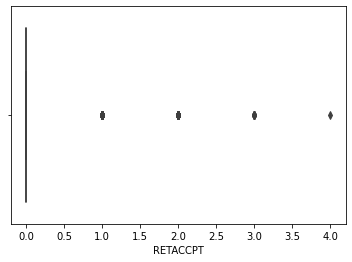

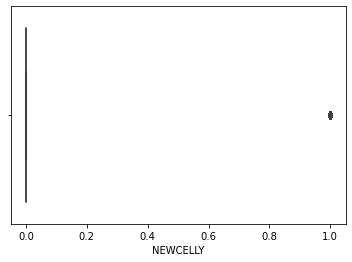

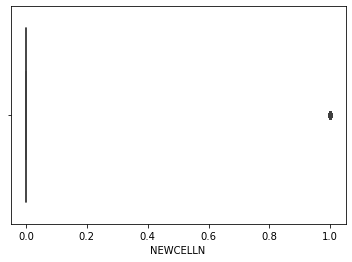

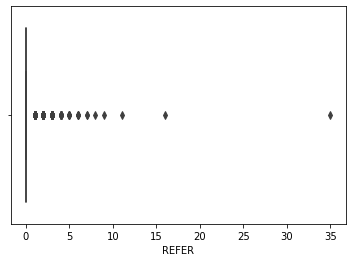

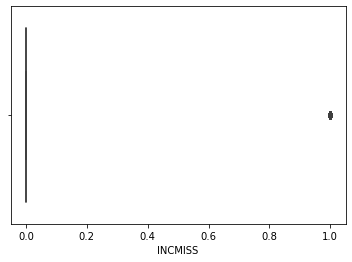

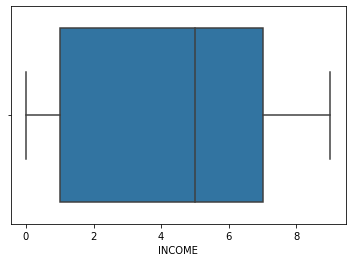

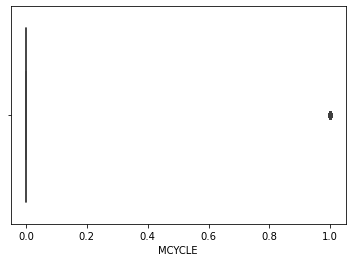

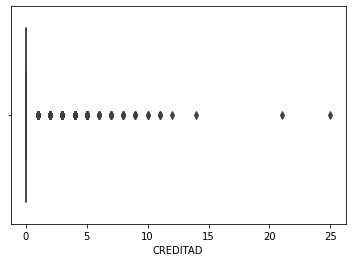

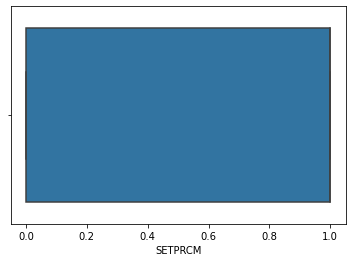

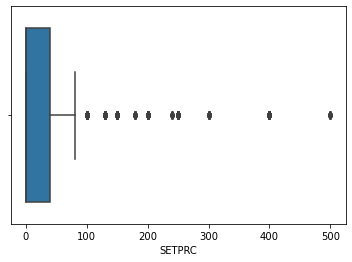

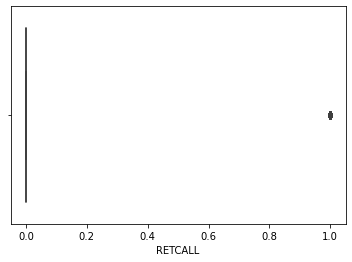

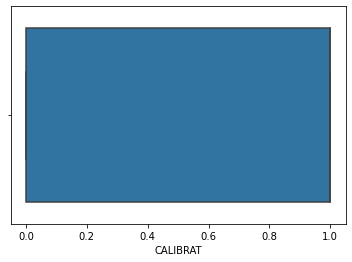

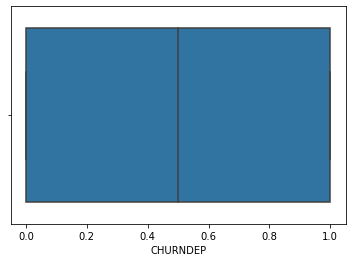

In [87]:
#dropping CSA as it has object dtype
cp=c2c.drop("CSA",axis=1)
for column in cp:
    plt.figure()
    sns.boxplot(c2c[column])

In [14]:
selected_columns = c2c[['REVENUE','MOU','RECCHRGE','DIRECTAS','OVERAGE','ROAM','CHANGEM','CHANGER','DROPVCE','BLCKVCE','UNANSVCE','CUSTCARE','THREEWAY','MOUREC','OUTCALLS','INCALLS','PEAKVCE','OPEAKVCE','DROPBLK','CALLFWDV','CALLWAIT','MONTHS','EQPDAYS','AGE1','AGE2']]
new_df = selected_columns.copy()
new_df.head(5)

,REVENUE,MOU,RECCHRGE,DIRECTAS,OVERAGE,ROAM,CHANGEM,CHANGER,DROPVCE,BLCKVCE,UNANSVCE,CUSTCARE,THREEWAY,MOUREC,OUTCALLS,INCALLS,PEAKVCE,OPEAKVCE,DROPBLK,CALLFWDV,CALLWAIT,MONTHS,EQPDAYS,AGE1,AGE2
0,57.49,482.75,37.43,0.25,22.75,0.0,532.25,50.99,8.33,1.00,61.33,1.67,0.33,55.28,46.33,6.33,83.67,157.00,9.33,0.0,5.67,49.0,240.0,30.0,0.0
1,82.28,1312.25,75.00,1.24,0.00,0.0,156.75,8.14,42.00,7.67,76.00,4.33,1.33,200.32,164.33,77.00,500.00,303.67,59.67,0.0,22.67,49.0,458.0,30.0,0.0
2,31.66,25.50,29.99,0.25,0.00,0.0,59.50,4.03,0.00,1.00,2.33,0.00,0.00,0.00,0.00,0.00,1.67,1.67,1.00,0.0,0.00,49.0,601.0,52.0,58.0
3,62.13,97.50,65.99,2.48,0.00,0.0,23.50,6.82,0.00,0.33,4.00,4.00,0.00,0.00,3.67,0.00,7.67,7.33,0.33,0.0,0.00,49.0,464.0,46.0,46.0
4,25.23,2.50,25.00,0.00,0.00,0.0,-2.50,-0.23,0.00,0.00,0.33,0.00,0.00,1.13,0.33,0.00,0.67,0.67,0.00,0.0,0.00,49.0,354.0,0.0,0.0


In [44]:
matrix = new_df.corr()
print(matrix)

           REVENUE       MOU  RECCHRGE  DIRECTAS   OVERAGE      ROAM  \
REVENUE   1.000000  0.722073  0.672910  0.447982  0.783680  0.274657   
MOU       0.722073  1.000000  0.578498  0.405040  0.571886  0.148378   
RECCHRGE  0.672910  0.578498  1.000000  0.324957  0.206664  0.135429   
DIRECTAS  0.447982  0.405040  0.324957  1.000000  0.311722  0.135972   
OVERAGE   0.783680  0.571886  0.206664  0.311722  1.000000  0.117174   
ROAM      0.274657  0.148378  0.135429  0.135972  0.117174  1.000000   
CHANGEM  -0.021534 -0.030300 -0.006253 -0.021585 -0.017980 -0.032329   
CHANGER  -0.048308 -0.046105 -0.024323 -0.026116 -0.041718 -0.030556   
DROPVCE   0.482535  0.630704  0.377768  0.286979  0.374301  0.122134   
BLCKVCE   0.273575  0.372817  0.217478  0.167697  0.222613  0.060419   
UNANSVCE  0.493895  0.679285  0.385470  0.321358  0.394903  0.090065   
CUSTCARE  0.242416  0.453055  0.199494  0.128468  0.186577  0.025053   
THREEWAY  0.253280  0.355959  0.186338  0.161069  0.214072  0.03

In [32]:
#From the above Correlation Matrix we can observe that there are few features which have high Multicollinearity. So we will remove those features and create a new dataframe called ncp.
ncp=new_df[['PRIZMRUR','MARRYYES','OCCRET','OCCPROF','OVERAGE','CREDITAA','NEWCELLY','CREDITAD','CREDITDE','CREDITC','OCCSELF','TRAVEL','PCOWN','PRIZMTWN','CREDITB','BLCKVCE','CHANGEM','ROAM','REVENUE','MAILRES','MARRYNO','TRUCK','ACTVSUBS','WEBCAP','CREDITA','MONTHS','RETACCPT','RETCALLS','REFURB','PHONES','CREDITGY','CHILDREN','AGE1','INCOME','CREDITCD','OWNRENT','CALLFWDV','REFER','DIRECTAS','THREEWAY','CUSTCARE','DROPVCE','UNANSVCE','OUTCALLS','MOU','OPEAKVCE','CHURN'
         ]].copy()

In [33]:
ncp.head()

,PRIZMRUR,MARRYYES,OCCRET,OCCPROF,OVERAGE,CREDITAA,NEWCELLY,CREDITAD,CREDITDE,CREDITC,OCCSELF,TRAVEL,PCOWN,PRIZMTWN,CREDITB,BLCKVCE,CHANGEM,ROAM,REVENUE,MAILRES,MARRYNO,TRUCK,ACTVSUBS,WEBCAP,CREDITA,MONTHS,RETACCPT,RETCALLS,REFURB,PHONES,CREDITGY,CHILDREN,AGE1,INCOME,CREDITCD,OWNRENT,CALLFWDV,REFER,DIRECTAS,THREEWAY,CUSTCARE,DROPVCE,UNANSVCE,OUTCALLS,MOU,OPEAKVCE,CHURN
0,0,0,0,0,22.75,0,0,1,1,0,0,0,0,0,0,1.00,532.25,0.0,57.49,1,1,1,1,1,0,49.0,0,0,0,7.0,0,0,30.0,5,1,1,0.0,0,0.25,0.33,1.67,8.33,61.33,46.33,482.75,157.00,0
1,0,0,0,0,0.00,0,1,0,0,1,0,0,0,0,0,7.67,156.75,0.0,82.28,1,1,0,2,1,0,49.0,0,0,0,9.0,0,0,30.0,6,1,0,0.0,0,1.24,1.33,4.33,42.00,76.00,164.33,1312.25,303.67,0
2,0,1,0,0,0.00,0,0,1,0,0,1,1,0,0,0,1.00,59.50,0.0,31.66,1,0,0,2,1,1,49.0,0,0,0,2.0,0,0,52.0,9,1,0,0.0,0,0.25,0.00,0.00,0.00,2.33,0.00,25.50,1.67,0
3,0,0,0,1,0.00,0,1,0,0,0,0,0,0,0,0,0.33,23.50,0.0,62.13,1,1,0,2,1,1,49.0,0,0,0,3.0,0,1,46.0,6,1,0,0.0,0,2.48,0.00,4.00,0.00,4.00,3.67,97.50,7.33,0
4,0,0,0,0,0.00,0,1,0,0,0,0,0,0,0,0,0.00,-2.50,0.0,25.23,0,0,1,2,1,1,49.0,0,0,0,2.0,0,0,0.0,7,0,1,0.0,0,0.00,0.00,0.00,0.00,0.33,0.33,2.50,0.67,0


In [34]:
ncp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71047 entries, 0 to 71046
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PRIZMRUR  71047 non-null  int64  
 1   MARRYYES  71047 non-null  int64  
 2   OCCRET    71047 non-null  int64  
 3   OCCPROF   71047 non-null  int64  
 4   OVERAGE   71047 non-null  float64
 5   CREDITAA  71047 non-null  int64  
 6   NEWCELLY  71047 non-null  int64  
 7   CREDITAD  71047 non-null  int64  
 8   CREDITDE  71047 non-null  int64  
 9   CREDITC   71047 non-null  int64  
 10  OCCSELF   71047 non-null  int64  
 11  TRAVEL    71047 non-null  int64  
 12  PCOWN     71047 non-null  int64  
 13  PRIZMTWN  71047 non-null  int64  
 14  CREDITB   71047 non-null  int64  
 15  BLCKVCE   71047 non-null  float64
 16  CHANGEM   71047 non-null  float64
 17  ROAM      71047 non-null  float64
 18  REVENUE   71047 non-null  float64
 19  MAILRES   71047 non-null  int64  
 20  MARRYNO   71047 non-null  in

**Logistic Regression**

In [35]:
X = ncp.drop("CHURN",axis=1)
y = ncp["CHURN"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)

In [40]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
predictions = logmodel.predict(X_test)

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83     25272
           1       0.32      0.00      0.01     10252

    accuracy                           0.71     35524
   macro avg       0.51      0.50      0.42     35524
weighted avg       0.60      0.71      0.59     35524

